# Dependencies

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM #Note: SVM are better with small sample size

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.exceptions import NotFittedError

pd.set_option('display.float_format', lambda x: '%.3f' % x) 
pd.set_option('display.colheader_justify', 'center')

sns.set()

# Data Preprocessing

In [9]:
data = pd.read_csv('/content/custom_datasets/creditcard.csv')
df = data.copy()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0


In [10]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
df[df.isnull().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [12]:
round(df.corr(),1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,0.100,-0.000,-0.400,-0.100,0.200,-0.100,0.100,-0.000,-0.000,0.000,-0.200,0.100,-0.100,-0.100,-0.200,0.000,-0.100,0.100,0.000,-0.100,0.000,0.100,0.100,-0.000,-0.200,-0.000,-0.000,-0.000,-0.000,-0.000
V1,0.100,1.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.200,-0.100
V2,-0.000,0.000,1.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.500,0.100
V3,-0.400,-0.000,0.000,1.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.200,-0.200
V4,-0.100,-0.000,-0.000,0.000,1.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.100,0.100
V5,0.200,0.000,0.000,-0.000,-0.000,1.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.400,-0.100
V6,-0.100,-0.000,0.000,0.000,-0.000,0.000,1.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.200,-0.000
V7,0.100,-0.000,0.000,0.000,-0.000,0.000,0.000,1.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.400,-0.200
V8,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,1.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.100,0.000
V9,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.100


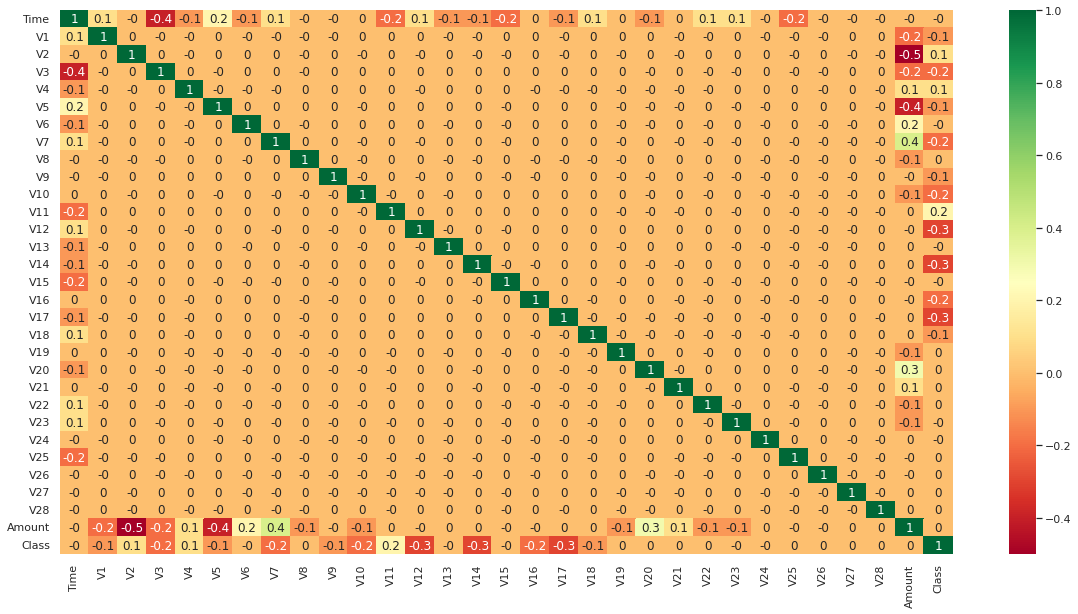

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(round(df.corr(),1),annot=True,cmap="RdYlGn")

In [14]:
df_fraud1 = df[df['Class'] == 1]
df_fraud0 = df[df['Class'] == 0]

df_fraud1.shape, df_fraud0.shape

((492, 31), (284315, 31))

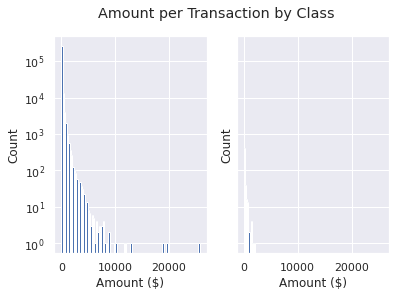

In [15]:
fig, ax = plt.subplots(1,2, sharex= True, sharey=True)
fig.suptitle('Amount per Transaction by Class')
ax[0].hist(x=df_fraud0['Amount'], bins=100)
ax[1].hist(x=df_fraud1['Amount'], bins=10)
ax[0].set_xlabel('Amount ($)')
ax[1].set_xlabel('Amount ($)')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')

plt.yscale('log')

In [16]:
df_fraud0_sample = df_fraud0.sample(frac= 0.003, random_state=42)
df_fraud0_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.000,1.315,0.591,-0.667,0.717,0.302,-1.125,0.389,-0.288,-0.132,-0.598,-0.325,-0.216,0.084,-1.055,0.968,0.601,0.631,0.295,-0.136,-0.058,-0.170,-0.430,-0.141,-0.200,0.639,0.399,-0.034,0.032,0.760,0
63099,50554.000,-0.799,1.185,0.905,0.695,0.219,-0.319,0.495,0.139,-0.760,0.171,0.822,0.468,-0.058,0.573,0.359,-0.012,-0.505,0.723,0.862,-0.081,0.202,0.579,-0.092,0.014,-0.246,-0.380,-0.396,-0.113,4.180,0
73411,55125.000,-0.391,-0.246,1.122,-1.309,-0.640,0.009,-0.701,-0.027,-2.629,2.051,0.576,-0.594,1.098,-0.338,0.618,-0.756,0.535,1.017,2.134,0.066,-0.133,0.117,-0.192,-0.489,-0.310,0.008,0.164,0.240,15.000,0
164247,116572.000,-0.060,1.065,-0.987,-0.030,0.176,-1.349,0.776,0.135,-0.150,-1.239,-0.841,-0.586,-0.780,-0.437,0.748,0.266,0.703,0.917,-0.190,-0.170,0.356,0.908,-0.018,-0.126,-0.340,-0.150,-0.024,0.042,57.000,0
148999,90434.000,1.848,0.373,0.269,3.866,0.088,0.970,-0.722,0.236,0.683,1.166,1.298,-1.921,1.885,1.323,-2.044,1.318,-0.441,0.804,-1.658,-0.283,0.104,0.621,0.197,0.692,-0.207,-0.021,-0.020,-0.043,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103122,68506.000,1.134,0.111,0.277,1.207,0.041,0.328,-0.053,0.167,0.095,0.050,0.821,0.963,-0.433,0.299,-0.739,-0.417,-0.091,-0.341,0.046,-0.175,-0.072,-0.030,-0.116,-0.295,0.666,-0.310,0.033,0.003,13.840,0
216576,140536.000,0.009,1.350,0.813,2.869,0.897,-0.080,1.034,-0.077,-1.597,0.772,-1.423,-0.421,0.221,-0.009,-1.283,0.656,-0.828,-0.196,-1.913,-0.233,0.375,1.141,-0.258,0.003,-0.039,0.171,0.044,0.043,10.620,0
29319,35418.000,-0.874,1.201,1.251,0.918,-0.250,-0.324,0.502,0.302,-0.799,-0.375,-1.133,0.764,1.183,-0.359,-1.760,0.381,-0.260,-0.771,-0.968,-0.225,0.100,0.303,-0.018,0.487,-0.525,0.722,-0.149,0.091,40.150,0
5982,6672.000,-1.738,-0.980,2.149,-0.745,-1.014,-0.329,-1.225,0.533,1.059,-0.893,0.319,-2.210,2.008,0.392,-2.455,0.401,1.907,-1.741,-0.516,-0.231,0.200,0.881,-0.509,0.663,0.174,-0.206,0.002,-0.359,67.430,0


In [17]:
df_fraud01 = shuffle(pd.concat([df_fraud0_sample, df_fraud1])).reset_index(drop=True)
df_fraud01

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,8040.000,-1.188,3.204,-1.708,0.831,1.829,-0.982,2.046,-1.530,3.820,3.616,4.604,-2.595,1.793,-4.322,0.217,-0.182,2.691,1.375,-0.995,2.055,-0.948,-0.091,-0.055,-0.419,-0.213,-0.634,-0.202,-1.411,0.890,0
1,41273.000,-1.548,-4.597,-1.191,1.200,-2.187,-0.864,1.988,-0.643,0.035,-0.877,0.087,0.330,0.119,0.653,1.224,0.316,-0.092,-0.453,-0.423,2.884,0.675,-1.388,-1.136,0.824,-0.415,0.672,-0.364,0.262,1464.940,0
2,155660.000,1.989,-1.333,0.174,-0.532,-1.634,0.306,-1.736,0.380,0.371,1.017,0.384,-0.218,-1.053,-0.025,0.593,-0.280,-0.737,2.451,-1.035,-0.577,-0.091,0.135,0.364,0.722,-0.782,0.560,0.001,-0.031,35.890,0
3,135314.000,-3.159,1.765,-3.390,0.987,-1.510,-1.281,-2.720,0.718,-1.660,-3.841,3.283,-3.907,0.951,-4.898,-0.552,-4.787,-9.334,-2.580,1.502,-0.023,1.121,1.605,-0.619,-0.251,-0.241,-0.004,-0.235,0.018,84.280,1
4,66465.000,-0.818,1.156,1.413,1.282,-0.173,0.271,0.169,0.650,-0.882,-0.406,1.063,0.869,-0.536,0.634,-0.462,-0.941,0.666,-0.166,0.998,-0.105,0.094,0.315,-0.161,0.243,0.079,-0.218,0.019,0.036,11.880,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,152168.000,-0.672,0.492,0.735,-1.604,2.523,4.175,0.073,0.984,0.197,-0.605,-0.049,-0.079,-0.241,-0.143,1.142,-0.207,-0.545,-0.122,0.288,0.295,-0.274,-0.586,-0.231,0.662,0.380,-0.407,0.172,-0.093,14.720,0
1341,130247.000,-0.333,1.019,0.048,-0.948,0.700,-0.533,1.068,-0.209,0.319,0.597,0.413,0.378,-0.427,0.012,-0.962,0.139,-0.932,-0.107,0.332,0.280,-0.360,-0.597,-0.008,-0.518,-0.391,0.133,0.293,-0.021,8.930,0
1342,50926.000,-0.924,0.579,1.354,0.789,0.706,-0.450,0.378,0.024,-0.224,0.734,1.495,0.011,-1.388,0.526,0.774,-0.526,-0.126,0.182,0.261,0.147,0.078,0.629,-0.205,0.216,-0.354,-0.332,0.437,0.028,10.020,0
1343,84204.000,-1.927,1.828,-7.019,5.348,-2.739,-2.107,-5.016,1.206,-4.383,-8.338,7.190,-9.425,-0.223,-12.875,-0.072,-6.300,-12.719,-3.740,0.844,2.173,1.377,-0.792,-0.771,-0.380,0.719,1.111,1.278,0.819,512.250,1


In [18]:
df_fraud01.rename(columns={'Class':'Fraud'}, inplace=True)

In [19]:
x = df_fraud01.drop('Fraud', axis=1)
y = df_fraud01['Fraud']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [21]:
x_train.iloc[:,0], y_train

(394     81372.000
 543     93879.000
 370    110552.000
 551     93860.000
 1330    94952.000
           ...    
 1095     5667.000
 1130   142280.000
 1294    62080.000
 860     53076.000
 1126    36537.000
 Name: Time, Length: 1076, dtype: float64, 394     1
 543     1
 370     1
 551     1
 1330    1
        ..
 1095    0
 1130    1
 1294    1
 860     1
 1126    0
 Name: Fraud, Length: 1076, dtype: int64)

# Modelling

In [22]:
pipelines ={
    'Isolation_Forest':make_pipeline(IsolationForest()), 
    'Local_Outlier_Factor':make_pipeline(LocalOutlierFactor()),
    'One_Class_SVM':make_pipeline(OneClassSVM())
}

pipelines

{'Isolation_Forest': Pipeline(steps=[('isolationforest', IsolationForest())]),
 'Local_Outlier_Factor': Pipeline(steps=[('localoutlierfactor', LocalOutlierFactor())]),
 'One_Class_SVM': Pipeline(steps=[('oneclasssvm', OneClassSVM())])}

In [23]:
fit_models = {}

for algo, pipe in pipelines.items():  
    try:
        print('Starting training for {}.'.format(algo))
        pipe.fit(x_train, y_train)
        fit_models[algo] = pipe
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for Isolation_Forest.
Isolation_Forest has been successfully fit.
Starting training for Local_Outlier_Factor.
Local_Outlier_Factor has been successfully fit.
Starting training for One_Class_SVM.
One_Class_SVM has been successfully fit.


In [24]:
try: 
    print(fit_models['Local_Outlier_Factor'].predict(x_test))
except:
    print('Except')
    print(fit_models['Local_Outlier_Factor'].fit_predict(x_test))

Except
[ 1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1]


In [25]:
try: 
    print(np.vectorize(lambda x: x-1 if x==1 else (x+2 if x==-1 else x))(fit_models['Local_Outlier_Factor'].predict(x_test)))
except:
    print('Except')
    print(np.vectorize(lambda x: x-1 if x==1 else (x+2 if x==-1 else x))(fit_models['Local_Outlier_Factor'].fit_predict(x_test)))



Except
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


# Evaluation

In [26]:
cm_models = {}

for model,algo in fit_models.items():

    try:
        yhat = np.vectorize(lambda x: x-1 if x==1 else (x+2 if x==-1 else x))(algo.predict(x_test))
    except:
        yhat = np.vectorize(lambda x: x-1 if x==1 else (x+2 if x==-1 else x))(algo.fit_predict(x_test))

    print ('Confusion Matrix for {} Model'.format(model.upper()))
    print(confusion_matrix(y_test, yhat))
    cm_models[model] = confusion_matrix(y_test, yhat)

Confusion Matrix for ISOLATION_FOREST Model
[[176   1]
 [ 66  26]]
Confusion Matrix for LOCAL_OUTLIER_FACTOR Model
[[171   6]
 [ 86   6]]
Confusion Matrix for ONE_CLASS_SVM Model
[[98 79]
 [43 49]]


In [27]:
target = ['0', '1'] #0, 1

for model,matrix in cm_models.items():
    print ('\n-------- Confusion Matrix DataFrame for {} --------\n'.format(model.upper()))
    print (pd.DataFrame(data=matrix, columns=['Predicted ' + t for t in target], index=['True ' + t for t in target]))


-------- Confusion Matrix DataFrame for ISOLATION_FOREST --------

        Predicted 0  Predicted 1
True 0      176           1     
True 1       66          26     

-------- Confusion Matrix DataFrame for LOCAL_OUTLIER_FACTOR --------

        Predicted 0  Predicted 1
True 0      171           6     
True 1       86           6     

-------- Confusion Matrix DataFrame for ONE_CLASS_SVM --------

        Predicted 0  Predicted 1
True 0      98           79     
True 1      43           49     


In [28]:
df_results = pd.DataFrame(columns=["Prediction Rate",'Missclassification Rate'], index=['Isolation_Forest','Local Outlier Factor','One Class SVM'])

In [29]:
idx = 0

for model,algo in fit_models.items():

    try:
        yhat = np.vectorize(lambda x: x-1 if x==1 else (x+2 if x==-1 else x))(algo.predict(x_test))
    except:
        yhat = np.vectorize(lambda x: x-1 if x==1 else (x+2 if x==-1 else x))(algo.fit_predict(x_test))

    df_results.iloc[idx,0] = accuracy_score(y_test,yhat)
    df_results.iloc[idx,1] = abs(accuracy_score(y_test,yhat)-1)
    idx += 1
    print ('{}\n{} | {}'.format(model, accuracy_score(y_test,yhat),abs(accuracy_score(y_test,yhat)-1)))

df_results

Isolation_Forest
0.7509293680297398 | 0.24907063197026025
Local_Outlier_Factor
0.6579925650557621 | 0.3420074349442379
One_Class_SVM
0.5464684014869888 | 0.45353159851301117


,Prediction Rate,Missclassification Rate
Isolation_Forest,0.751,0.249
Local Outlier Factor,0.658,0.342
One Class SVM,0.546,0.454
